<a href="https://colab.research.google.com/github/IsWallison/Deteccao_de_Fraude/blob/main/Projeto_Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

---

# Detecção de Fraudes em Cartões de Crédito

Neste projeto, iremos abordar o problema das fraudes em cartões de crédito, uma das principais preocupações das instituições financeiras como bancos e *fintechs*. Apenas no Brasil, cerca de 12,1 milhões de pessoas já foram vítimas de algum tipo de fraude financeira no último ano. Traduzindo em valores, os golpes financeiros ultrapassaram a cifra de R$ 1,8 bilhão de prejuízo por ano para os últimos 12 meses.

<p align=center>
<img src="https://images.unsplash.com/photo-1592772874383-d08932d29db7?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=699&q=80" width="60%"></p>

Dentra essas fraudes, aquelas envolvendo cartões de crédito são de grande relevância uma vez que a sua não-detecção acaretará em prejuízos consideráveis, tanto para o consumidor quanto para a instituição financeira.

Um outro fator a ser considerado é a quantidade de falsos positivos, ou seja, aquelas vezes em que você tentou fazer uma compra e teve seu cartão bloqueado preventivamente - o que provavelmente gerou estresse e constrangimento.

Por todos esses motivos, o investimento na área de detecção de fraudes por meio de Inteligência Artificial vem crescendo a cada ano, representando uma grande oportunidade em *Data Science*. 

Dispondo de grandes volumes de dados como base histórica, um algoritmo de machine learning apenas um pouco melhor que os anteriores já representa uma economia de milhões de Reais. E esse é o desafio, aprimorar cada vez mais o uso de algoritmos visando inibir ou evitar transações fraudulentas.

## Importando os Dados

Os dados que usaremos neste projeto foram disponibilizados por algumas empresas européias de cartão de crédito. O *dataset* representa as operações financeiras que aconteceram no período de dois dias, onde foram classificadas 492 fraudes em meio a quase 290 mil transações.

Como você pode notar, este é um conjunto de dados extremamente desbalanceado, onde as fraudes representam apenas 0,17% do total.

Outro detalhe interessante é que as *features* são todas numéricas, e foram descaracterizadas (por problemas ligados à privacidade e segurança). Assim, os nomes das colunas são representados por $[V1, V2, V3 \dots, V28]$ 

<p align=center>
<img src="https://images.unsplash.com/photo-1620714223084-8fcacc6dfd8d?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=1051&q=80" width="50%"></p>

[Na página original dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), também é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA).

A PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos - os chamados **componentes**.

Esses componentes são em número menor or igual às variáveis originais. No caso deste projeto, os componentes achados pela transformação da PCA são as próprias colunas $[V1, V2, V3 \dots, V28]$.

Neste código, vamos importar algumas bibliotecas para ajudar a realizar as tarefas específicas que precisamos. Essas bibliotecas fornecem conjuntos de funções e classes pré-escritas que nos permitirão realizar as tarefas de forma mais eficiente e evitarão a necessidade de escrever tudo do zero.

In [2]:
# importar os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error, confusion_matrix

# Importar os modelos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor

from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.filterwarnings('ignore')

Para facilitar a aquisição dos dados, criei um *link* com acesso direto ao `csv`. Com isso, basta importar o conjunto de dados usando o método `pd.read_csv()`.

CSV é a sigla para Comma Separated Values (em português, valores separados por vírgulas). Um arquivo CSV é um arquivo de texto simples que armazena informações de planilhas e tabelas. O conteúdo geralmente é uma tabela de texto, números ou datas. Os arquivos CSV podem ser facilmente importados e exportados usando programas que armazenam dados em tabelas.

Os dados serão atribuidos a variavel 'df'.

In [3]:
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

# importar os dados para um dataframe
df = pd.read_csv(file_path)

# dimensões do conjunto original
print("Dimensões do Conjunto Original: ", df.shape)


Dimensões do Conjunto Original:  (284807, 31)


Com os dados importados para dentro de uma estrutura *Dataframe* - e não havendo a necessidade de mais nenhum ajuste ou configuração nesta etapa, pode-se iniciar uma análise exploratória dos dados a fim de preparar um modelo de *Machine Learning*.

Vamos à Análise Exploratória.

## Análise Exploratória

* Ver as 5 primeiras entradas atravez da função **head()**, Ela é usada para retornar as primeiras N linhas de um conjunto de dados, onde N é um valor especificado pelo usuário, por padrão o valor de N é 5.


In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [28]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

* Ver o resumo estatístico do dataframe 
"describe()" é uma função comum em bibliotecas de análise de dados, ela é usada para calcular estatísticas descritivas básicas de um conjunto de dados, como média, desvio padrão, quartis e contagem.



In [25]:
df[['Time','Amount', 'Class']].describe()

,Time,Amount,Class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


Os valores de 'Time' e 'Amount" variam de 0 até 172.792 e 0 até 25.691 respectivamente, terão de ser normalizados, pois apresentam uma escala muito diferente.

A função "info()" é usada para obter informações gerais sobre um conjunto de dados, incluindo o número de linhas e colunas, o tipo de dados de cada coluna, a quantidade de valores não-nulos e memória usada.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

* Plotar um gráfico de barras para vizualizar o balanceamento do *dataset*


0    284315
1       492
Name: Class, dtype: int64
Fraudes representam 0.173% do dataset. 



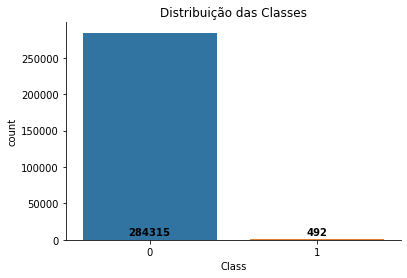

In [35]:
print(df['Class'].value_counts())
print(f"Fraudes representam {(((df['Class']==1).sum())/df.shape[0]*100):.3f}% do dataset. \n")

fig, ax = plt.subplots();

sns.countplot('Class', data=df, ax=ax);
ax.set_title('Distribuição das Classes');
total = df['Class'].value_counts()

#Adicionar valor na barra
for i in range(2):
  ax.text(i, i+10000, total[i], va='center', ha='center', fontweight='bold',)

#remover borda lateral e superior
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)



Existe um desequilíbrio de classes, o que significa que uma classe tem muito mais exemplos do que outra. Se não balancearmos os dados, o modelo pode se inclinar para a classe majoritária e não ser capaz de classificar adequadamente a classe minoritária. 
Para ficar claro "class = 0" significa que a transação é normal, enquanto "class = 1" significa fraude


Abixo temos um gráficos de histograma para vizualiar fraudes e transações normais.
Histograma é a representação gráfica em colunas ou em barras que demonstra uma distribuição de frequências. 

Os histogramas em si são plotados com base nas colunas "Time" e "Class" do dataframe 

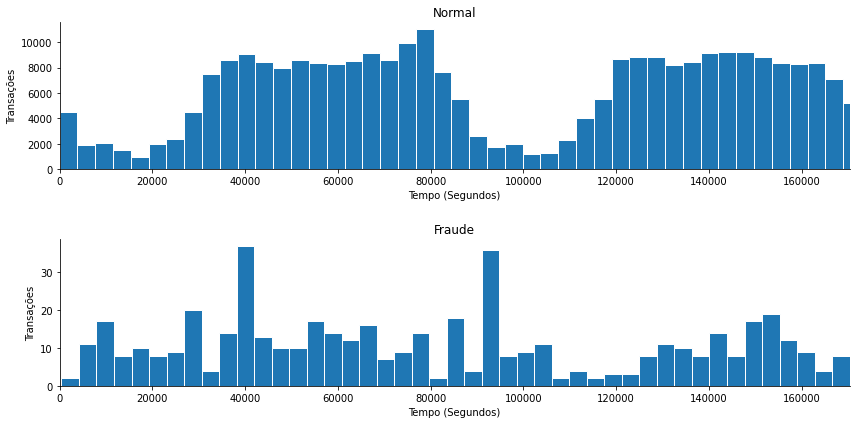

In [ ]:
fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12,6));

num_bins = 45
# Plotar o primeiro gráfico com classe = 0 
df['Time'][df['Class'] == 0].hist(ax=ax1,bins=num_bins,edgecolor="white", linewidth=1)
# Plotar o segundo gráfico com classe = 1
df['Time'][df['Class'] == 1].hist(ax=ax2,bins=num_bins,edgecolor="white", linewidth=1)

# Definir titulo e elementos do gráfico 1
ax1.set_title("Normal")
ax1.set_xlabel("Tempo (Segundos)\n")
ax1.set_ylabel("Transações")
ax1.grid(visible=None)
#Remover borda superior e lateral do gráfico 1
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_xlim(0, (df['Time'][df['Class'] == 1].max()))

# Definir titulo e elementos do gráfico 2
ax2.set_title("Fraude")
ax2.set_xlabel("Tempo (Segundos)")
ax2.set_ylabel("Transações")
#Remover borda superior e lateral do gráfico 2
ax2.grid(visible=None)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.set_xlim(0, (df['Time'][df['Class'] == 1].max()))


plt.tight_layout()

Abixo temos um gráfico de caixa para vizualiar fraudes e transações normais.
O gráfico de caixa (também conhecido como box plot) é uma representação gráfica usada para resumir a distribuição de um conjunto de dados. Ele apresenta uma visão geral da dispersão dos dados, incluindo informações sobre a mediana, os quartis, o mínimo, o máximo e os valores atípicos.


O gráfico de caixa é útil para comparar a distribuição de vários conjuntos de dados, bem como para identificar valores atípicos. 

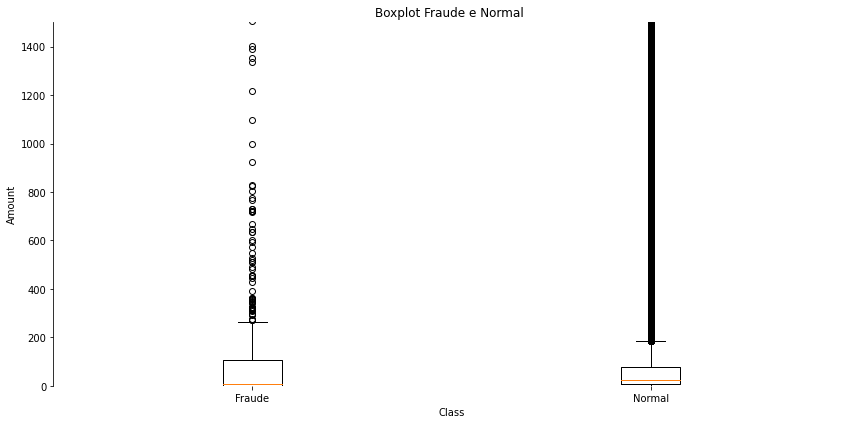

In [33]:
fig, ax = plt.subplots(figsize=(12,6))

# Plot the first box plot using the first dataset
ax.boxplot(df['Amount'][df['Class'] == 1], positions=[1])

# Plot the second box plot using the second dataset
ax.boxplot(df['Amount'][df['Class'] == 0], positions=[2])

ax.set_title("Boxplot Fraude e Normal ")
ax.set_xlabel("Class")
ax.set_ylabel("Amount")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks([])   # remove y-tick labels for the first subplot
ax.set_ylim(0, 1500)
plt.xticks([2, 1], ['Normal', 'Fraude'])


plt.subplots_adjust(wspace=100, hspace=-50)

plt.tight_layout()

A função "corr()" é usada para calcular a correlação entre variáveis em uma base de dados. 
A correlação é uma medida estatística que descreve a força e a direção da relação linear entre duas variáveis.
já um heatmap é um tipo de gráfico de visualização de dados que apresenta informações em forma de matriz, onde as células são coloridas com base em seus valores. Heatmaps são usados para representar dados multivariados, especialmente para mostrar a correlação entre variáveis. 

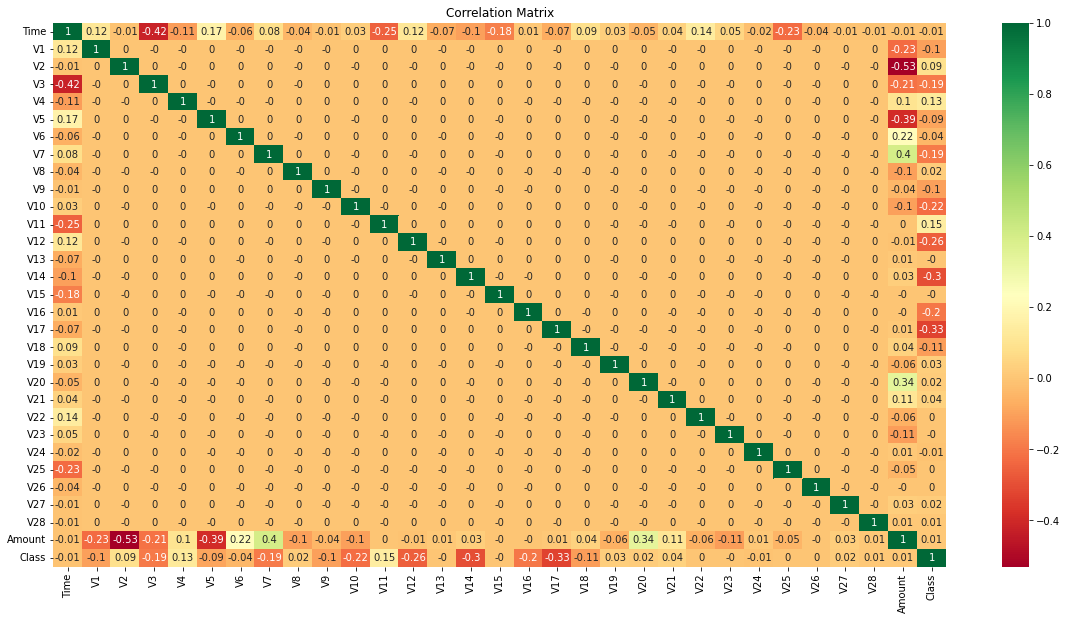

In [ ]:
corr = df.corr()
corr= corr.round(2)

# Create a figure and an Axes object
fig, ax = plt.subplots(figsize=(20, 10))

# Plot the heatmap
sns.heatmap(corr, cmap='RdYlGn', annot=True, ax=ax,)

# Set the title
ax.set_title("Correlation Matrix")

# Show the plot
plt.show()

## Preparação dos Dados

* Normalizar os dados que ainda não haviam sido pré-processados (`Time` e `Amount`)

Fazer uma copia os dados do DataFrame original (df) para um novo DataFrame (df_clean). Em seguida, aplicar a técnica de normalização de padronização aos dados de "Amount" e "Time". Isso é feito usando a classe StandardScaler do pacote scikit-learn.

A técnica de padronização consiste em subtrair a média dos dados e dividir pelo desvio padrão. O resultado é armazenado nas novas colunas "std_amount" e "std_time".

Finalmente, as colunas "Time" e "Amount" são removidas do DataFrame df_clean. O comando head() no final do código é usado para ver as primeiras entradas do DataFrame normalizado.

* Dividir o conjunto de dados entre treino e validação
* [*Recomendado*] Balancear o conjunto de dados

In [42]:
#Copia
df_clean = df.copy()

#Padronização
std_scaler = StandardScaler()
df_clean['std_amount'] = std_scaler.fit_transform(df_clean['Amount'].values.reshape(-1, 1))
df_clean['std_time'] = std_scaler.fit_transform(df_clean['Time'].values.reshape(-1, 1))

#remoção time e amount antigos
df_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

# ver as primeiras entradas
df_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


Com os valores padronizados podemos dividir o conjunto de dados entre treino e validação usando a função train_test_split. A função divide os dados em dois conjuntos, um usado para treinamento e outro usado para validação. 

Estamos usando as colunas sem a coluna 'Class' como dados de treinamento (X_train) e a coluna 'Class' como rótulos de treinamento (y_train).

In [ ]:
# separar variáveis entre X e y com as colunas escolhidas y vai ser ser o alvo 
X = df_clean.drop('Class', axis=1)
y = df['Class']

# dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,stratify=y, shuffle=True)

print('X Train : ', X_train.shape )
print('Test : ', X_test.shape)
print('Y Train : ', y_train.shape)
print('y Test : ',y_test.shape)
print('Fraude:', sum(y==1))
print('Normal:', sum(y==0))

X Train :  (213605, 30)
Test :  (71202, 30)
Y Train :  (213605,)
y Test :  (71202,)
Fraude: 492
Normal: 284315


Vamos normalizar as variáveis de entrada com StandardScaler. Isso é feito para que todas as variáveis tenham a mesma escala e, assim, o modelo não seja afetado desproporcionalmente por variáveis com escalas diferentes.

em seguida vamos balancear os dados utilizando o RandomUnderSampler, que é usado para diminuir a quantidade de exemplos da classe majoritária. Isso é feito para garantir que o modelo não seja afetado pelo desequilíbrio de classes. 

E tambem dividiremos os dados balanceados em conjuntos de treinamento e teste.

In [ ]:
# Normalizar
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Balancear
ros = RandomUnderSampler()
X , y = ros.fit_resample(X,y)

# dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,stratify=y, shuffle=True)
print('X Train : ', X_train.shape)
print('y Train : ', y_train.shape)
print('X Test : ', X_test.shape)
print('y Test : ',y_test.shape)
print('Fraude:', sum(y==1))
print('Normal:', sum(y==0))

X Train :  (738, 30)
y Train :  (738,)
X Test :  (246, 30)
y Test :  (246,)
Fraude: 492
Normal: 492


Agora temos a mesma quantidade de valores para transações normais e fraudes, sendo eles 492. Agora podemos seguir para o treino e teste de modelos de aprendizado de máquina.

##Modelo k-nearest neighbors

KNN (k-nearest neighbors) é um algoritmo de aprendizado de máquina supervisionado que pode ser usado para classificação ou regressão. Ele funciona armazenando todos os dados de treinamento e, quando um novo dado é fornecido, ele encontra os k vizinhos mais próximos a esse novo dado e usa a classe predominante entre esses vizinhos como a previsão para esse novo dado. Ele é amplamente utilizado devido à sua simplicidade e facilidade de implementação.

Primeiramente vou utilizar um loop for para descobrir o número de vizinhos a serem considerados no algoritmo que apresente o melhor desempenho, baseado no menor falso positivo da matriz de confusão, pois por se tratar de um projeto de fraude de cartão, queremos detectar o máximo possivel de fraudes.

A matrix de confusão é uma ferramenta importante para avaliar o desempenho de um modelo de classificação. Ele fornece uma visão geral das previsões corretas e erradas feitas pelo modelo

<p align=left>
<img src="https://miro.medium.com/max/1400/1*T8Pnw0kiVbrPGnqnB2I_Zw.jpeg" width="60%"></p>

In [ ]:
#Getting the best parammer
acc1 = 100
for i in range(1,50):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train, y_train)
    y_pred_knn = knn_model.predict(X_test)
    matrix_confi = confusion_matrix(y_test, y_pred_knn)  
    false_negative = int(matrix_confi[1][0])
    if false_negative < acc1:
        acc1 = false_negative
        n_nei = i
print('n_neighbors:', n_nei)


n_neighbors: 1



O valor de k=1 foi considerado o valor ideal para k, pois apresentou o menor valor de falso negativo.
 
Agora iremos treinar nosso modelo e analisar o desempenho.

In [ ]:
#Criar o modelo k-nearest neighbors e treinar com dados de treino
knn_model = KNeighborsClassifier(n_neighbors =n_nei)
knn_model.fit(X_train, y_train)

#validar com dados de teste
y_pred_knn = knn_model.predict(X_test)


Com o modelo ja treinado vamos avaliar a precisão do modelo usando dados de validação e calcular métricas como acurácia, F1 score, precisão e recall entre outras.


In [ ]:
#Avaliação do modelo knn com os dados de teste comparados com os dados reais
knn_mae = mean_absolute_error(y_test, y_pred_knn)
knn_mse = mean_squared_error(y_test, y_pred_knn)
knn_rmse = np.sqrt(knn_mse)
knn_accuracy = knn_model.score(X_test, y_test)
knn_confusion_matrix = confusion_matrix(y_test, y_pred_knn)

print("Accuracy: ", knn_accuracy)
print("MAE:", knn_mae)
print("RMSE:", knn_rmse)
print(classification_report(y_test, y_pred_knn))
print("Confusion Matrix:", knn_confusion_matrix)

Accuracy:  0.9349593495934959
MAE: 0.06504065040650407
RMSE: 0.25503068522533534
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       123
           1       0.96      0.91      0.93       123

    accuracy                           0.93       246
   macro avg       0.94      0.93      0.93       246
weighted avg       0.94      0.93      0.93       246

Confusion Matrix: [[118   5]
 [ 11 112]]


Acurácia: 0.93 é a proporção de previsões corretas feitas pelo modelo em relação ao total de previsões.

MAE (mean absolute error): 0.06 é a média do erro absoluto. Este é um indicador da diferença entre as previsões do modelo e os valores reais. Quanto menor o MAE, melhor é o desempenho do modelo.

RMSE (root mean squared error): 0.25 é a raiz quadrada da média dos erros ao quadrado. É uma medida mais intensa da diferença entre as previsões do modelo e os valores reais. Quanto menor o RMSE, melhor é o desempenho do modelo.

A precisão, recall e f1-score são métricas de desempenho utilizadas para avaliar modelos de classificação. A precisão indica a porcentagem de previsões corretas do modelo, o recall indica a porcentagem de instâncias positivas que foram corretamente identificadas pelo modelo e o f1-score é a média harmônica entre precisão e recall.

Matriz de confusão: A matriz de confusão apresentada mostra o número de previsões corretas (120 e 110) e previsões erradas (3 e 13) para cada classe. A matriz de confusão pode ser usada para avaliar o desempenho do modelo em relação a cada classe.



## Naive Bayes


Naive Bayes é um algoritmo de classificação baseado na Teorema de Bayes. Ele é chamado de "naive" porque assume que todas as variáveis independentes (características) são independentes entre si, isso significa que a presença ou ausência de uma característica não afeta a presença ou ausência de outra característica. O que geralmente não é verdade, ainda assim pode ser eficaz em muitos casos. 

<p align=left>
<img src="https://miro.medium.com/max/1101/1*0a2wA8H1nbyEXILf0WBcHA.png" width="60%"></p>

In [ ]:
#Criar o modelo Naive Bayes e treinar com dados de treino
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

#validar com dados de teste
y_pred_nb = nb_model.predict(X_test)

In [ ]:
#Avaliação do modelo Naive Bayes com os dados de teste comparados com os dados reais
nb_mae = mean_absolute_error(y_test, y_pred_nb)
nb_mse = mean_squared_error(y_test, y_pred_nb)
nb_rmse = np.sqrt(nb_mse)
nb_accuracy = nb_model.score(X_test, y_test)
nb_confusion_matrix = confusion_matrix(y_test, y_pred_nb)
print("MAE:", nb_mae)
print("RMSE:", nb_rmse)
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))
print("Confusion Matrix:", nb_confusion_matrix)

MAE: 0.08130081300813008
RMSE: 0.2851329742561005
Accuracy: 0.9186991869918699
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       123
           1       0.96      0.87      0.91       123

    accuracy                           0.92       246
   macro avg       0.92      0.92      0.92       246
weighted avg       0.92      0.92      0.92       246

Confusion Matrix: [[119   4]
 [ 16 107]]


Acurácia: 0.91 

MAE: 0.089

RMSE: 0.30 

Matriz de confusão: previsões corretas (119 e 105) e previsões erradas (4 e 18) 

Desempenho do modelo foi um pouco inferior quando comparado ao KNN.

##Logistic Regretion


A Regressão Logística é um tipo de modelo de classificação que é usado para prever a probabilidade de uma amostra pertencer a uma determinada classe. Ele se baseia na teoria de probabilidade e utiliza a função logística para modelar a relação entre a variável dependente e as variáveis ​​independentes.
O objetivo é encontrar os melhores coeficientes (parâmetros) do modelo para prever a classe de uma amostra desconhecida com base nas suas características.

<p align=left>
<img src="https://pimages.toolbox.com/wp-content/uploads/2022/04/11040522/46-4.png" width="60%"></p>

In [ ]:
#Criar o modelo de Logistic Regretion e treinar com dados de treino
regre_model = LogisticRegression(random_state=1)
regre_model.fit(X_train, y_train)

#validar com dados de teste
y_pred_regre = regre_model.predict(X_test)

In [ ]:
#Avaliação do modelo Logistic Regretion com os dados de teste comparados com os dados reais
regre_mae = mean_absolute_error(y_test, y_pred_regre)
regre_mse = mean_squared_error(y_test, y_pred_regre)
regre_rmse = np.sqrt(regre_mse)
regre_accuracy = regre_model.score(X_test, y_test)
regre_confusion_matrix = confusion_matrix(y_test, y_pred_regre)
print("MAE:", regre_mae)
print("RMSE:", regre_rmse)
print("Accuracy:", accuracy_score(y_test, y_pred_regre))
print(classification_report(y_test, y_pred_regre))
print("Confusion Matrix:", regre_confusion_matrix)

MAE: 0.06504065040650407
RMSE: 0.25503068522533534
Accuracy: 0.9349593495934959
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       123
           1       0.97      0.89      0.93       123

    accuracy                           0.93       246
   macro avg       0.94      0.93      0.93       246
weighted avg       0.94      0.93      0.93       246

Confusion Matrix: [[120   3]
 [ 13 110]]


Acurácia: 0.94 

MAE: 0.060

RMSE: 0.24 

Matriz de confusão: previsões corretas (119 e 112) e previsões erradas (4 e 11) 

Em geral, estes resultados indicam que o modelo tem desempenho muito bom, sendo os resultados desse modelo superiores aos dois modelos treinandos anteriormente.

## Decision Tree



A Árvore de Decisão é um algoritmo de aprendizado de máquina supervisionado que se baseia em um modelo de árvore para fazer previsões. Ele funciona criando ramificações na árvore para representar as decisões que devem ser tomadas ao longo do caminho até a previsão final. As folhas da árvore representam as previsões finais, que podem ser classes ou valores contínuos.
<p align=left>
<img src="https://repository-images.githubusercontent.com/186166778/48227b00-8dbf-11e9-8d62-e0d54cae1431" width="60%"></p>


In [ ]:
#Criar o modelo de Decision Tree e treinar com dados de treino
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

#validar com dados de teste
y_pred_tree = knn_model.predict(X_test)

In [ ]:
#Avaliação do modelo Decision Tree com os dados de teste comparados com os dados reais
tree_mae = mean_absolute_error(y_test, y_pred_tree)
tree_mse = mean_squared_error(y_test, y_pred_tree)
tree_rmse = np.sqrt(tree_mse)
tree_accuracy = tree_model.score(X_test, y_test)
tree_confusion_matrix = confusion_matrix(y_test, y_pred_tree)

print("MAE:", tree_mae)
print("RMSE:", tree_rmse)
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))
print("Confusion Matrix:", tree_confusion_matrix)

MAE: 0.06504065040650407
RMSE: 0.25503068522533534
Accuracy: 0.9349593495934959
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       123
           1       0.96      0.91      0.93       123

    accuracy                           0.93       246
   macro avg       0.94      0.93      0.93       246
weighted avg       0.94      0.93      0.93       246

Confusion Matrix: [[118   5]
 [ 11 112]]


Acurácia: 0.93

MAE: 0.065

RMSE: 0.25

Matriz de confusão: previsões corretas (123 e 107) e previsões erradas (0 e 16) 

Em geral, estes resultados são bons mas são inferiores ao da regressçao logistica.

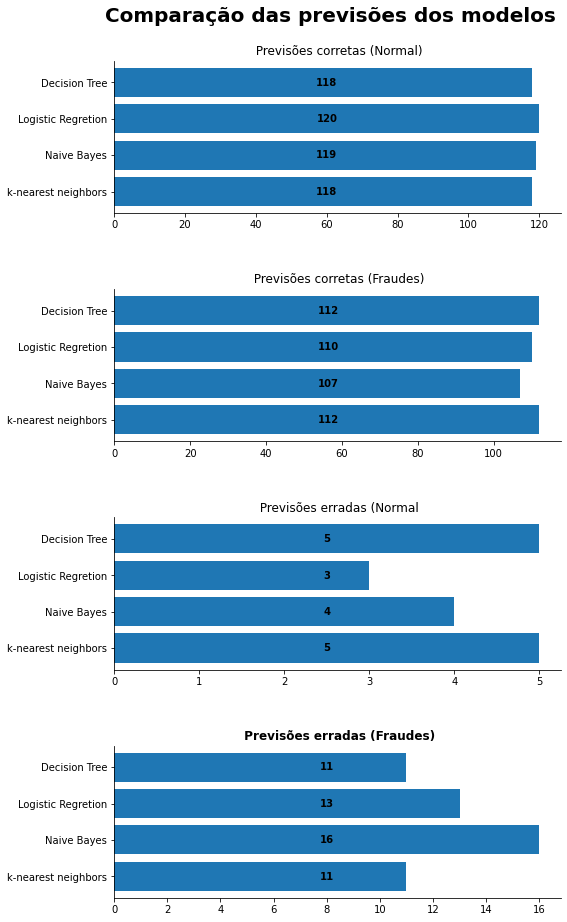

In [ ]:
matrix = [knn_confusion_matrix, nb_confusion_matrix, regre_confusion_matrix, tree_confusion_matrix]

# Define o nome dos modelos
model_names = ['k-nearest neighbors', 'Naive Bayes', 'Logistic Regretion', 'Decision Tree']

# Cria o gráfico de barras para os acertos
fig, (ax1,ax2,ax3,ax4) = plt.subplots(nrows=4, ncols=1, figsize=(8,15));


ax1.barh(model_names, [matrix[i][0][0] for i in range(4)])
ax1.set_title(" Previsões corretas (Normal)")
ax1.set_ylabel("")
ax1.set_ylabel("")
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)


ax2.barh(model_names, [matrix[i][1][1] for i in range(4)])
ax2.set_title(" Previsões corretas (Fraudes)")
ax2.set_ylabel("")
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)


ax3.barh(model_names, [matrix[i][0][1] for i in range(4)])
ax3.set_title(" Previsões erradas (Normal")
ax3.set_ylabel("")
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)


ax4.barh(model_names, [matrix[i][1][0] for i in range(4)])
ax4.set_title(" Previsões erradas (Fraudes)", fontweight='bold')
ax4.set_ylabel("")
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)

#Distancia do título
fig.subplots_adjust(top=0.9, hspace=0.5)

# título principal
plt.suptitle("Comparação das previsões dos modelos", fontsize=20, fontweight='bold',y=0.95)

#Adicionar valores nas barras
for i in range(4):
    ax1.text(60, i, matrix[i][0][0], va='center', ha='center', fontweight='bold')
    ax2.text(56.5, i, matrix[i][1][1], va='center', ha='center', fontweight='bold')
    ax3.text(2.5, i, matrix[i][0][1], va='center', ha='center', fontweight='bold')
    ax4.text(8, i, matrix[i][1][0], va='center', ha='center', fontweight='bold')

plt.show()